# MNIST DATASET CLASSIFICATION

## 1. Importing the required libraries

This block imports the necessary PyTorch modules, dataset utilities, and visualization tools.
It also checks whether a GPU (CUDA) is available and sets the device accordingly.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## 2. Loading the MNIST dataset with transforms

Here, we define the transformations applied to the dataset, including converting images to tensors and normalizing them.
MNIST is downloaded and loaded into training and testing sets.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_data = datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=False)

## 3. Visualizing sample training images

This block extracts one batch from the training dataloader and displays 8 sample images along with their labels.

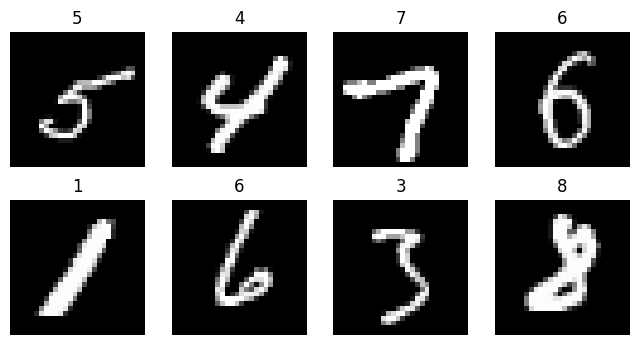

In [6]:
examples = next(iter(train_loader))
images, labels = examples

plt.figure(figsize=(8,4))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(images[i].squeeze(),cmap='grey')
  plt.title(labels[i].item())
  plt.axis("off")
plt.show()

## 4. Defining the neural network model

A simple fully connected neural network is defined.
The model flattens the input image and applies two dense layers, with ReLU activation between them.

In [22]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)     # flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MNISTModel().to(device)
model

MNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## 5. Defining the loss function and optimizer

The loss used is CrossEntropyLoss, suitable for multi-class classification.
Adam optimizer is used to update the network weights.

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##  6. Training the model

The training loop iterates through the dataset for a defined number of epochs.
For each batch, images and labels are moved to the device, predictions are computed, loss is calculated, gradients are backpropagated, and the optimizer updates the model weights.

In [24]:
epochs = 5

for epoch in range(epochs):
    total_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/5, Loss: 0.3762
Epoch 2/5, Loss: 0.1888
Epoch 3/5, Loss: 0.1401
Epoch 4/5, Loss: 0.1120
Epoch 5/5, Loss: 0.0957


## 7. Evaluating the model on the test dataset

During evaluation, gradient calculations are disabled.
Predictions are generated, compared with true labels, and total accuracy is computed.

In [25]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.56%


## 8. Visualizing predictions

A batch of test images is passed through the model.
The true labels and predicted labels are shown side by side for the first eight images.

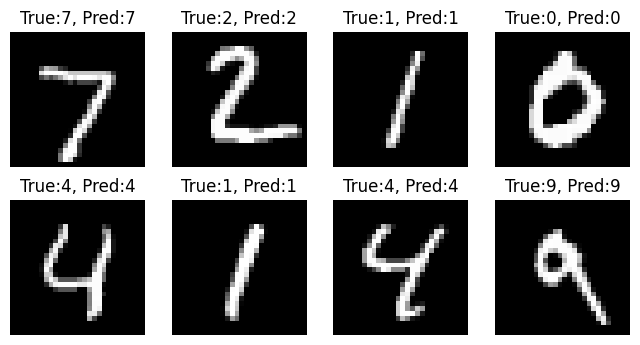

In [26]:
examples = next(iter(test_loader))
images, labels = examples

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)
predicted = predicted.cpu()

plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"True:{labels[i]}, Pred:{predicted[i].item()}")
    plt.axis("off")
plt.show()
